### 서울시 평균 기온 예측 해커톤

- 일사합 : 1년동안 태양의 복사에너지가 땅에 닿는 양(일사량)의 합계
- 일조합 : 년간 일사시간(구름이나 안개 따위에 가려지지 아니하고 햇볕이 실제로 내리쬐는 시간)의 합계
- 일조율 : 일조시간/가조시간

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb

### 전처리

In [4]:
df = pd.read_csv('./data/train.csv')
df.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


In [5]:
df_test = pd.read_csv('./data/sample_submission.csv')
df_test

,일시,평균기온
0,2023-01-01,0
1,2023-01-02,0
2,2023-01-03,0
3,2023-01-04,0
4,2023-01-05,0
...,...,...
353,2023-12-20,0
354,2023-12-21,0
355,2023-12-22,0
356,2023-12-23,0


In [6]:
# 수치형 데이터로 변경
df['일시'] = pd.to_datetime(df['일시'])
df_test['일시'] = pd.to_datetime(df_test['일시'])

In [7]:
df.info()
## 모두 수치형 데이터  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      23011 non-null  datetime64[ns]
 1   최고기온    23008 non-null  float64       
 2   최저기온    23008 non-null  float64       
 3   일교차     23007 non-null  float64       
 4   강수량     9150 non-null   float64       
 5   평균습도    23011 non-null  float64       
 6   평균풍속    23007 non-null  float64       
 7   일조합     22893 non-null  float64       
 8   일사합     18149 non-null  float64       
 9   일조율     22645 non-null  float64       
 10  평균기온    23011 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.9 MB


In [8]:
df.isnull().sum() 
## 평균습도 , 평균기온 이외의 모든 값 결측치 존재함 
## 강수량 결측치는 비안온날로 예상되므로 0으로 채우기 
## 나머지 결측치들은 평균값으로 대체할 예정

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

### 결측치처리

In [9]:
## 결측치처리
### 강수량
df['강수량'] = df['강수량'].fillna(0)

In [10]:
df['최고기온'] = df['최고기온'].fillna(method='ffill')
df['최저기온'] = df['최저기온'].fillna(method='ffill')
df['평균풍속'] = df['평균풍속'].fillna(method='ffill')
df['일조합'] = df['일조합'].fillna(method='ffill')
df['일조율'] = df['일조율'].fillna(method='ffill')

C:\Users\user\AppData\Local\Temp\ipykernel_18856\3910853723.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['최고기온'] = df['최고기온'].fillna(method='ffill')
C:\Users\user\AppData\Local\Temp\ipykernel_18856\3910853723.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['최저기온'] = df['최저기온'].fillna(method='ffill')
C:\Users\user\AppData\Local\Temp\ipykernel_18856\3910853723.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['평균풍속'] = df['평균풍속'].fillna(method='ffill')
C:\Users\user\AppData\Local\Temp\ipykernel_18856\3910853723.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['일조합'] = df['일조합'].fillna(method='ffill')
C:\Users\u

In [11]:
df.loc[df[df['일교차'].isnull()].index, '일교차'] =  df['최고기온'] - df['최저기온']

In [12]:
df['일조율'] = df['일조율'].fillna(method='ffill')

C:\Users\user\AppData\Local\Temp\ipykernel_18856\2867231608.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['일조율'] = df['일조율'].fillna(method='ffill')


In [13]:
df[df['일조율'].isnull()]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,0.0,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
361,1960-12-27,-0.7,-9.4,8.7,0.0,61.3,1.8,0.0,NaN,NaN,-5.2
362,1960-12-28,-4.3,-9.8,5.5,0.0,53.0,3.7,4.3,NaN,NaN,-7.5
363,1960-12-29,-7.9,-13.5,5.6,0.0,49.3,5.0,9.0,NaN,NaN,-10.8
364,1960-12-30,-9.7,-16.0,6.3,0.0,53.3,5.7,8.2,NaN,NaN,-12.8


In [14]:
df.isnull().sum()

일시         0
최고기온       0
최저기온       0
일교차        0
강수량        0
평균습도       0
평균풍속       0
일조합        0
일사합     4862
일조율      366
평균기온       0
dtype: int64

In [15]:
### 일사합 
df[df['일사합'].isnull()] ## 4862
target = df[df['일시'].dt.year <= 1980]
target['일사합'].isnull().sum() ## 4824 1980년대 이전의 데이터의 절반은 없음

4824

In [16]:
target = df[['일조합','일사합','일조율']]
target.corr()
# 일조율과 일사합의 상관계수가 높으므로 일조합으로 일조율 계산 

,일조합,일사합,일조율
일조합,1.000000,0.788160,0.958378
일사합,0.788160,1.000000,0.636781
일조율,0.958378,0.636781,1.000000


### 회귀분석을 통한 일사합 예측 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [18]:
target1 = df[['일조합','일조율']]
target_train = target1[~target1['일조율'].isnull()]
target_test = target1[target1['일조율'].isnull()]

In [19]:
x_train = target_train['일조합']
y_train = target_train['일조율']
x_test = target_test['일조합']

In [20]:
X_train, X_val, Y_train, Y_val= train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [21]:
import numpy as np

X_train = X_train.values.reshape(-1, 1)

In [22]:
X_val = X_val.values.reshape(-1, 1)

In [23]:
# 모델 생성 및 훈련 
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_val)

In [25]:
mean_squared_error(Y_val, y_pred)

78.81201962675672

### 모델 적용

In [26]:
target_train = target1[~target1['일조율'].isnull()]
target_test = target1[target1['일조율'].isnull()]
x = target_train['일조합']
y = target_train['일조율']
x_test = target_test['일조합']

In [27]:
import numpy as np

x = x.values.reshape(-1, 1)

In [28]:
# 모델 생성 및 훈련 
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [29]:
x_test = x_test.values.reshape(-1, 1)
y_pred = model.predict(x_test)

In [30]:
target_test['일조율'] = y_pred

C:\Users\user\AppData\Local\Temp\ipykernel_18856\131460427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_test['일조율'] = y_pred


In [31]:
target_test

,일조합,일조율
0,6.7,55.338502
1,0.0,2.040280
2,0.0,2.040280
3,2.6,22.723172
4,8.2,67.270939
...,...,...
361,0.0,2.040280
362,4.3,36.246601
363,9.0,73.634906
364,8.2,67.270939


In [32]:
df.loc[df['일조율'].isnull(), '일조율'] = y_pred

In [33]:
df['일조율'].isnull().sum()

0

In [34]:
df[['일시','일사합']]

,일시,일사합
0,1960-01-01,NaN
1,1960-01-02,NaN
2,1960-01-03,NaN
3,1960-01-04,NaN
4,1960-01-05,NaN
...,...,...
23006,2022-12-27,10.25
23007,2022-12-28,10.86
23008,2022-12-29,10.88
23009,2022-12-30,10.84


### EDA

In [35]:
df['일시'].dt.strftime('%Y-%m')

0        1960-01
1        1960-01
2        1960-01
3        1960-01
4        1960-01
          ...   
23006    2022-12
23007    2022-12
23008    2022-12
23009    2022-12
23010    2022-12
Name: 일시, Length: 23011, dtype: object

In [36]:
target = df.groupby(df['일시'].dt.strftime('%Y-%m'))['평균기온'].mean()

In [37]:
target = target.tail(50)

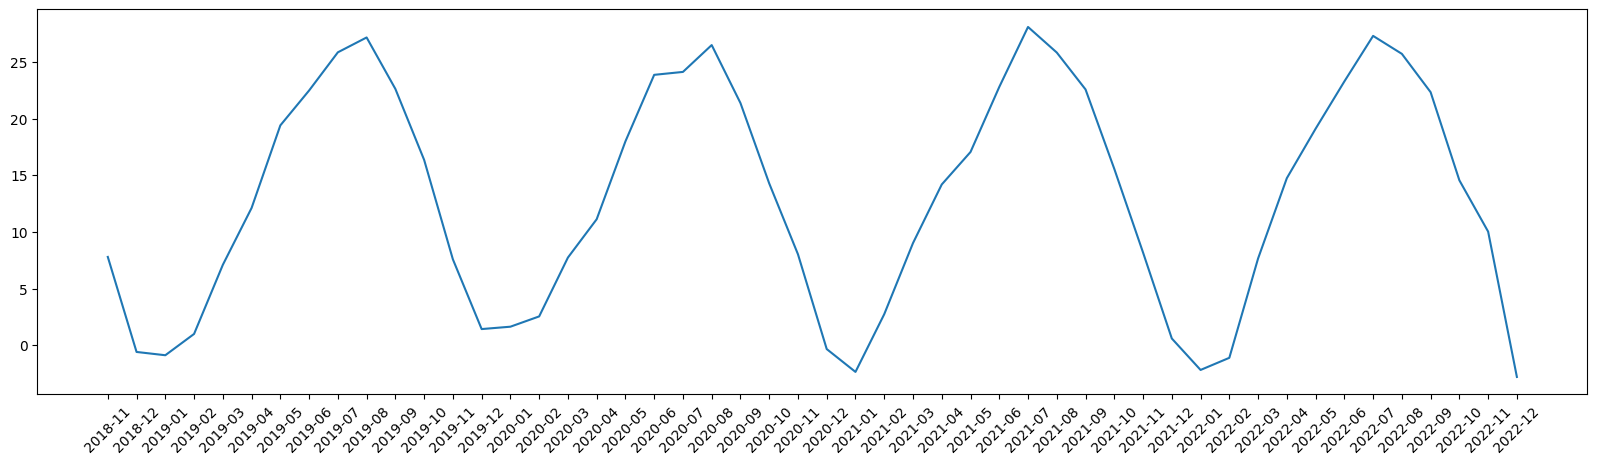

In [38]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
plt.plot(target.index, target.values)

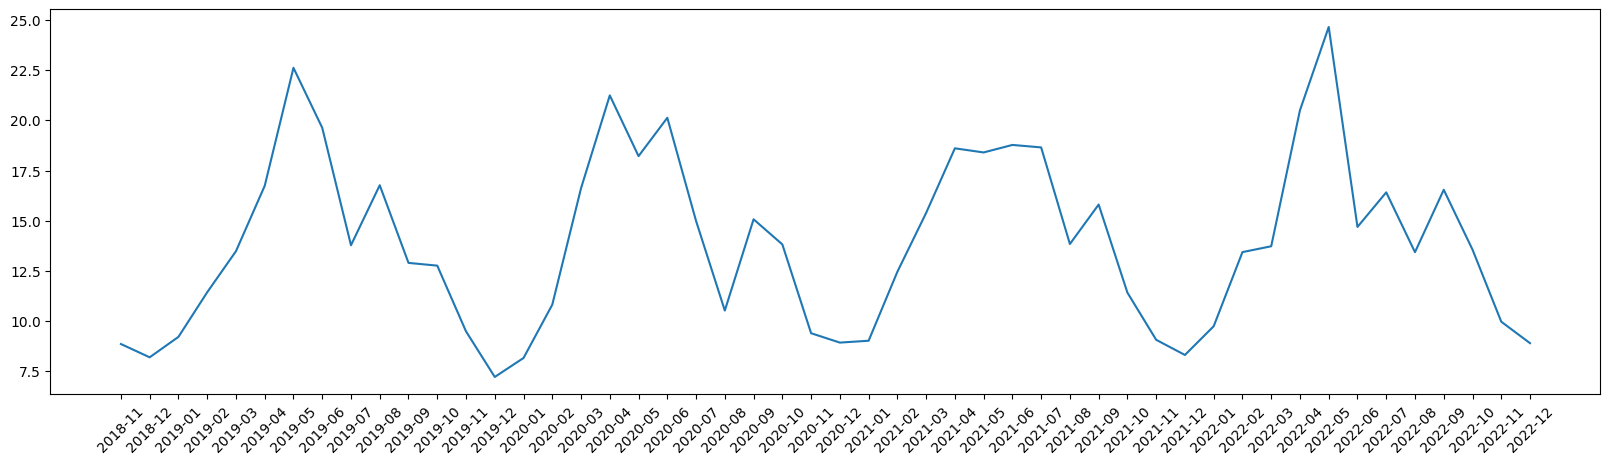

In [39]:
target = df.groupby(df['일시'].dt.strftime('%Y-%m'))['일사합'].mean()
target = target.tail(50)

plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
plt.plot(target.index, target.values)

### 일변량 시계열분석
- 다른변수는 고려하지않고 일시와 평균기온만 가지고 시계열 예측 시도 (ARIMA)

In [43]:
target = df[['일시','평균기온']]
target.set_index('일시', inplace=True)

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [45]:
def test_stationarity(timeseries):
    # 이동평균 및 이동표준편차 계산
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    # 시계열 플로팅
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.title('Original, Rolling Mean, and Rolling Std')
    plt.legend()
    plt.show()

    # Dickey-Fuller 검정
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['평균기온'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

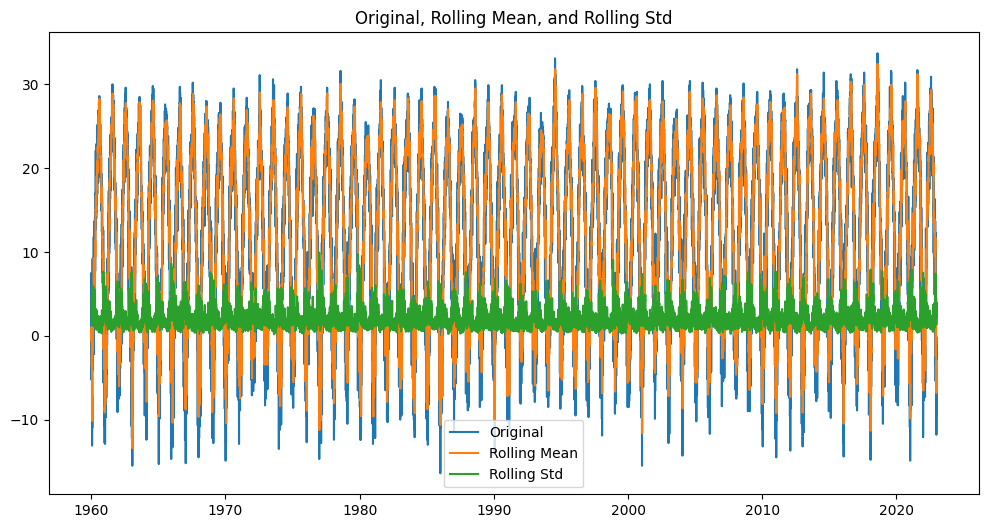

Results of Dickey-Fuller Test:
Test Statistic                -1.661919e+01
p-value                        1.704000e-29
#Lags Used                     4.700000e+01
Number of Observations Used    2.296300e+04
Critical Value (1%)           -3.430635e+00
Critical Value (5%)           -2.861666e+00
Critical Value (10%)          -2.566837e+00
dtype: float64


In [46]:
test_stationarity(target)

# Results of Dickey-Fuller Test:
# Test Statistic                -1.661919e+01
# p-value                        1.704000e-29 # p-value = 1.7 < 0.05이므로 귀무가설 기각 정상성을 가지고 있음 > 일정한 추세나 계절성이 없음을 의미함 
# #Lags Used                     4.700000e+01 # 사용된 시차의 수
# Number of Observations Used    2.296300e+04 # 사용된 관측치의 수 
# Critical Value (1%)           -3.430635e+00 # 임계값 
# Critical Value (5%)           -2.861666e+00
# Critical Value (10%)          -2.566837e+00

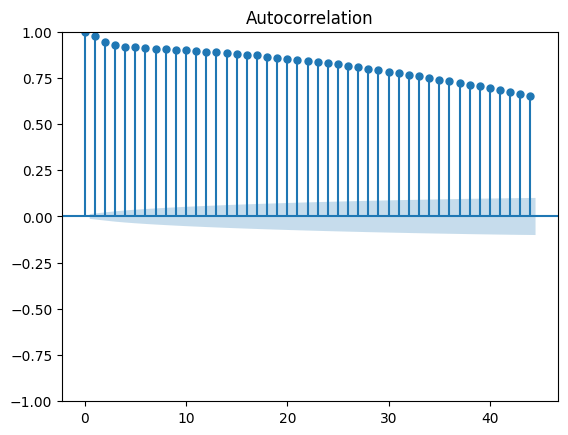

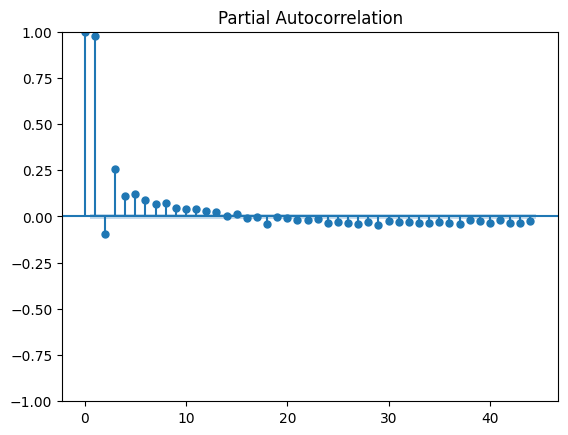

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(target['평균기온'])
plot_pacf(target['평균기온'])
plt.show()

In [48]:
## 위의 그래프로 추측할 수 있지만 대부분 for문을 돌려서 가장 일반적인 파라미터 결정함
best_aic = np.inf
best_order = None
for p in range(3):  # p의 범위를 적절히 지정
    for d in range(2):  # d의 범위를 적절히 지정
        for q in range(3):  # q의 범위를 적절히 지정
            try:
                model = ARIMA(target['평균기온'], order=(p, d, q))
                results = model.fit()
                aic = results.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                continue

c:\Python\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [49]:
print(f"Best ARIMA Order: {best_order} with AIC: {best_aic}")


Best ARIMA Order: (2, 1, 2) with AIC: 101834.88408860372


In [50]:
arima_model = ARIMA(target['평균기온'], order=best_order)
arima_results = arima_model.fit()

c:\Python\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [51]:
forecast_steps = 30
forecast = arima_results.get_forecast(steps=forecast_steps)


In [52]:
## test데이터에 예측 
forecast_steps = len(df_test)
forecast = results.get_forecast(steps=forecast_steps)
forecast_df = pd.DataFrame({'평균기온_예측': forecast.predicted_mean}, index=forecast.predicted_mean.index)
forecast_df.sort_index(inplace=True)
forecast_df

,평균기온_예측
2023-01-01,-1.908728
2023-01-02,-2.626174
2023-01-03,-2.946184
2023-01-04,-3.028620
2023-01-05,-3.029543
...,...
2023-12-20,-3.007994
2023-12-21,-3.007994
2023-12-22,-3.007994
2023-12-23,-3.007994


In [53]:
forecast_df

,평균기온_예측
2023-01-01,-1.908728
2023-01-02,-2.626174
2023-01-03,-2.946184
2023-01-04,-3.028620
2023-01-05,-3.029543
...,...
2023-12-20,-3.007994
2023-12-21,-3.007994
2023-12-22,-3.007994
2023-12-23,-3.007994


In [54]:
df_test['평균기온_예측'] = forecast_df['평균기온_예측']

In [64]:
# df_test = df_test.reset_index(drop=True)  # 인덱스를 재설정하면서 불일치 문제를 해결할 수 있습니다.
forecast_df = forecast_df.reset_index(drop=True)
df_test['평균기온'] = forecast_df['평균기온_예측']

In [67]:
df_test.to_csv('./result/result2.csv',index=False)

100   -3.007994
101   -3.007994
102   -3.007994
103   -3.007994
104   -3.007994
         ...   
195   -3.007994
196   -3.007994
197   -3.007994
198   -3.007994
199   -3.007994
Name: 평균기온_예측, Length: 100, dtype: float64

In [58]:
## 망함^^...... 
## 계절성을 고려해서 다시 분석해보기 

### 다변량 시계열 분석
- LSTM 이용 

### randomforest


In [45]:
df.isnull().sum()
df_test.isnull().sum()

일시      0
평균기온    0
dtype: int64

In [47]:
df.tail()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
23006,2022-12-27,3.3,-7.3,10.6,0.0,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8
23010,2022-12-31,2.1,-5.1,7.2,0.0,65.5,1.4,1.1,4.16,11.5,-1.2


In [46]:
df_test

,일시,평균기온
0,2023-01-01,0
1,2023-01-02,0
2,2023-01-03,0
3,2023-01-04,0
4,2023-01-05,0
...,...,...
353,2023-12-20,0
354,2023-12-21,0
355,2023-12-22,0
356,2023-12-23,0


In [42]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
predict = model.predict(x_test)